## Imports

In [ ]:
################ Run if needed################
#import zipfile
#with zipfile.ZipFile("dataset.zip","r") as zip_ref:
#    zip_ref.extractall("dataset")

In [2]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils

import numpy as np 
import PIL
import os
import mat73
from tqdm import tqdm
import matplotlib.pyplot as plt 
%matplotlib inline
plt.ion()

## Data loading

In [2]:
###############################################################

In [17]:
from collections import Counter################################
Counter(data_labels) ##########################################

Counter({1: 708, 3: 930, 2: 1426})

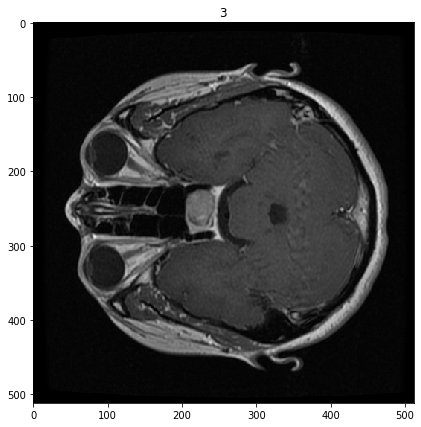

In [10]:
fig= plt.figure(figsize=(7, 7))
plt.imshow(data_struct[3][0], cmap='gray')
plt.title(data_struct[3][1])
plt.show()

In [3]:
########### try using balanced classes 708 930 1000 ###########

## Data loader

In [3]:
class BrainTumorDataset(Dataset):
    def __init__(self, dir, transform=None):

        self.files = os.listdir(dir)
        self.data_struct = []
        self.transform = transform

        for file in tqdm(self.files):
            data_dict = mat73.loadmat(dir + file)
            self.data_struct.append([data_dict['cjdata']['image'], int(data_dict['cjdata']['label'])])
            
    def __len__(self):
        return len(self.data_struct)

    def __getitem__(self, index):

        image = PIL.Image.fromarray(self.data_struct[index][0])

        if self.transform:
            image = self.transform(image)

        label = self.data_struct[index][1]

        sample = image , label
        return sample

In [4]:
data_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.ToTensor()])

In [5]:
dataset = BrainTumorDataset('dataset/dataset/', transform=data_transform)

batch_size = 16
test_size = .2
valid_size = .2
shuffle_dataset = True
seed= 69

dataset_size = len(dataset)
train_split = int(np.floor(dataset_size - dataset_size * (test_size + valid_size) ))
test_split = int(np.floor(train_split + dataset_size * test_size ))

indices = list(range(dataset_size))
if shuffle_dataset :
    np.random.seed(seed)
    np.random.shuffle(indices)

train_indices, test_indices, valid_indices = indices[:train_split], indices[train_split: test_split], indices[test_split:]

train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)
valid_sampler = SubsetRandomSampler(valid_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)
valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

100%|██████████| 3064/3064 [00:18<00:00, 167.33it/s]


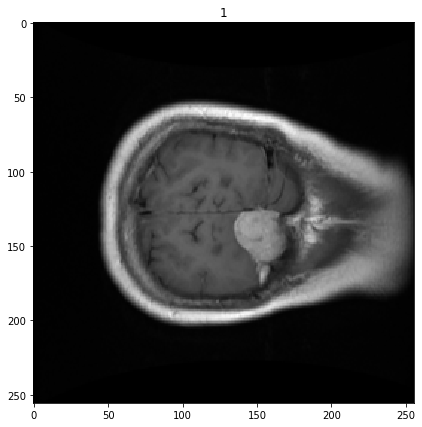

In [7]:
images, labels = next(iter(train_loader))
fig= plt.figure(figsize=(7, 7))
plt.imshow(images[0][0], cmap='gray')
plt.title(int(labels[0]))
plt.show()

In [8]:
###############################################################
print(len(train_indices))
print(len(test_indices))
print(len(valid_indices))

1838
612
614
